
# Pregunta 1:

Aprendizaje supervisado: En este tipo de aprendizaje, se entrena al modelo con un conjunto de datos que incluye las entradas y las salidas deseadas. El modelo aprende a mapear las entradas a las salidas. Es útil para tareas de clasificación y regresión. Ejemplos: predecir el precio de una casa basado en sus características.

Aprendizaje no supervisado: Aquí, el modelo se entrena usando un conjunto de datos que no tiene etiquetas. El objetivo es descubrir patrones ocultos en los datos. Se utiliza para clustering y reducción de dimensionalidad. Ejemplo: segmentar clientes en grupos basados en sus compras.

# Pregunta 2:

Utilizaía aprendizaje supervisado.  En el contexto de la salud, las entradas pueden ser una variedad de factores, como síntomas, antecedentes médicos, resultados de laboratorio, y factores de estilo de vida. La salida, en este caso, sería el diagnóstico: enfermo o no enfermo.



# Pregunta 3:

Suele ser necesario dividir el conjunto de datos en dos,  entrenamiento y prueba. Esto permite entrenar el modelo con un conjunto de datos y luego evaluar su rendimiento con un conjunto diferente. Esto ayuda a identificar cómo el modelo se desempeña con datos no vistos, evitando el sobreajuste.

Ademas una vez el modelo es entrenado, se puede probar con distintos set de datos.

# Pregunta 4:

Diferencia en modelamiento de regresión lineal entre estadística y aprendizaje de máquinas

En el enfoque estadístico, la regresión lineal se centra en inferir la relación entre las variables independientes y la variable dependiente, evaluando la significancia de los predictores y la calidad del ajuste del modelo. En aprendizaje de máquinas, el enfoque está en la predicción, optimizando el modelo para que pueda predecir con precisión nuevas observaciones, a menudo con menos énfasis en la interpretación de los coeficientes.

# Pregunta 5:
**Aprendizaje Supervisado (Clasificación)**

Predicción del Rendimiento Estudiantil: Un modelo de clasificación puede ser entrenado para predecir el rendimiento académico de los estudiantes basándose en variables como asistencia a clases, notas obtenidas en trabajos y exámenes previos, participación en actividades extracurriculares, y otros factores relevantes. Este modelo podría ayudar a identificar estudiantes en riesgo de bajo rendimiento o deserción, permitiendo a la universidad intervenir con medidas de apoyo.

**Aprendizaje Supervisado (Regresión)**

Predicción de la Demanda de Cursos: Mediante la regresión, una universidad podría predecir la demanda futura de diferentes cursos y programas basándose en tendencias históricas, cambios en el mercado laboral, y la popularidad de ciertos campos de estudio. Esto podría ayudar en la planificación de recursos, como asignación de salones, contratación de personal docente, y la creación de nuevos programas de estudio.

**Aprendizaje No Supervisado (Clustering)**

Segmentación de Estudiantes para Programas de Mentoría: Un modelo de clustering podría ser utilizado para agrupar a los estudiantes en diferentes segmentos según sus intereses académicos, necesidades, y comportamientos. Esto facilitaría el diseño de programas de mentoría y asesoramiento personalizados, mejorando la experiencia educativa y el apoyo al estudiante.

**Aprendizaje No Supervisado (Reducción de Dimensionalidad)**

Análisis de Encuestas Estudiantiles: La reducción de dimensionalidad puede ser aplicada a los datos recopilados a través de encuestas estudiantiles para identificar los principales factores que influyen en la satisfacción estudiantil, el compromiso académico, y la percepción de la calidad educativa. Se pueden extraer insigt valiosos para la toma de decisiones estratégicas de la universidad.

In [2]:
# Pregunta 6:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_excel('/content/data-housing.xlsx')

print(df.head())


      price  area  bedrooms  bathrooms  stories guestroom hotwaterheating  \
0  13300000  7420         4          2        3        no              no   
1  12250000  8960         4          4        4        no              no   
2  12250000  9960         3          2        2        no              no   
3  12215000  7500         4          2        2        no              no   
4  11410000  7420         4          1        2       yes              no   

  airconditioning  parking  
0             yes        2  
1             yes        3  
2              no        2  
3             yes        3  
4             yes        2  


In [5]:
# Pregunta 7:
datos_nulos = df.isnull().sum()
datos_nulos


price              0
area               0
bedrooms           0
bathrooms          0
stories            0
guestroom          0
hotwaterheating    0
airconditioning    0
parking            0
dtype: int64

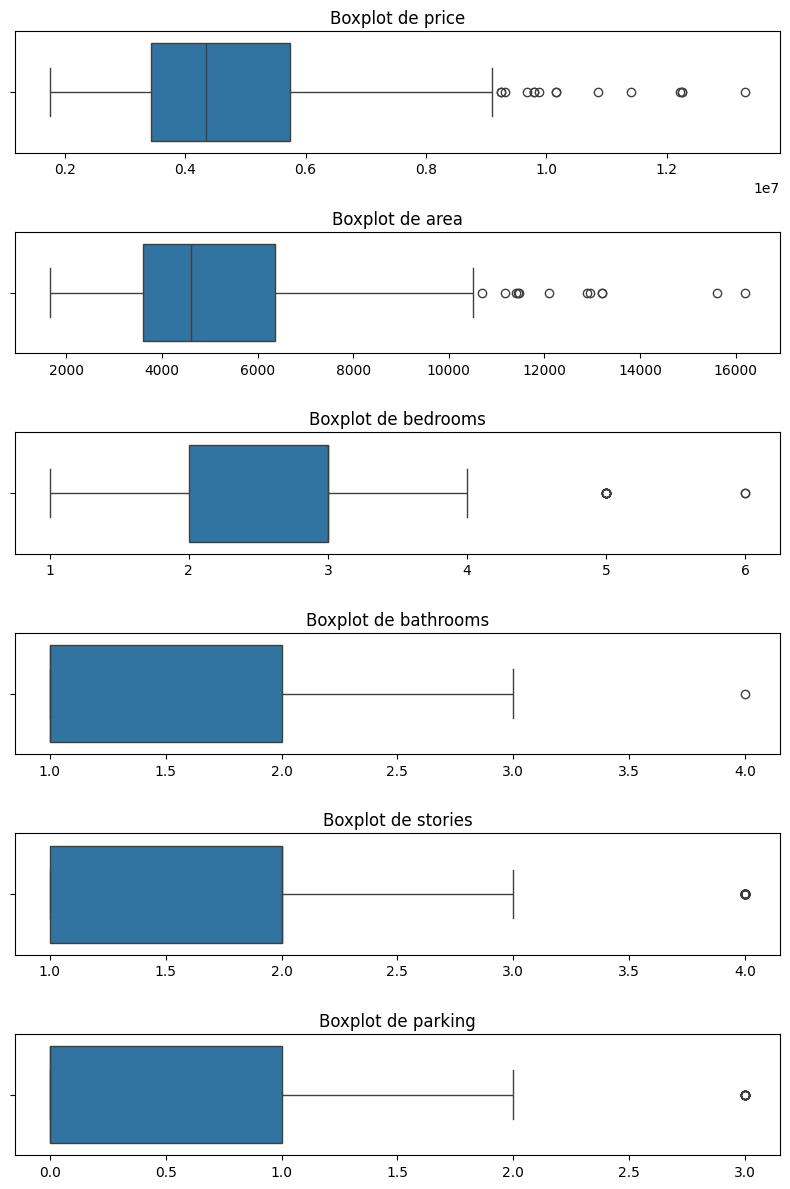

In [7]:
# Gráfico de caja para la variables
# Crear gráficos de caja individuales para cada variable numérica, mostrándolos uno por uno
variables_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Ajustar el tamaño de los gráficos para acomodar cada variable
fig, axes = plt.subplots(len(variables_numericas), 1, figsize=(8, 12))

for i, var in enumerate(variables_numericas):
    sns.boxplot(x=df[var], ax=axes[i])
    axes[i].set_title(f"Boxplot de {var}")
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()




Se aprecian datos extraños en la mayoria de variables, pero no necesariamente son atipicos en este caso no se procedera a realizar la limpieza de datos atipicos, ya que considero que se pierde informacion relevante

In [9]:
# Revisar valores únicos para variables categóricas como 'guestroom', 'hotwaterheating', y 'airconditioning'
print(df['guestroom'].value_counts())
print(df['hotwaterheating'].value_counts())
print(df['airconditioning'].value_counts())
print(df['bedrooms'].value_counts())


no     448
yes     97
Name: guestroom, dtype: int64
no     520
yes     25
Name: hotwaterheating, dtype: int64
no     373
yes    172
Name: airconditioning, dtype: int64
3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Preparar los datos: Codificar variables categóricas
categorical_features = ['guestroom', 'hotwaterheating', 'airconditioning']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                 remainder="passthrough")

transformed_X = transformer.fit_transform(df.drop(['price', 'area'], axis=1))
y = df['price']

# Dividir los datos en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2, random_state=42)

# Construir y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")


Error Cuadrático Medio (MSE): 2465837987317.578
Coeficiente de Determinación (R^2): 0.5121567478276798


el Coeficiente de Determinación (R^2) es de 0.51 lo cual indica que el modelo puede explicar cerca del 51% de la variabilidad en el precio de las viviendas con las variables proporcionadas.

Aunque esto muestra una capacidad predictiva moderada, hay espacio para mejorar el modelo, posiblemente explorando otras variables, realizando una selección de características más detallada, o probando diferentes tipos de modelos de regresión.